https://github.com/YubiaoYue/MedMamba

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('dataset/mamba/', train=True, download=True,
                     transform=transforms.Compose([
                         transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),
                        #  transforms.Normalize(
                        #      (0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
                     ])),
    batch_size=64, shuffle=True)

/Data/GRZ/Temp_project_b/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified


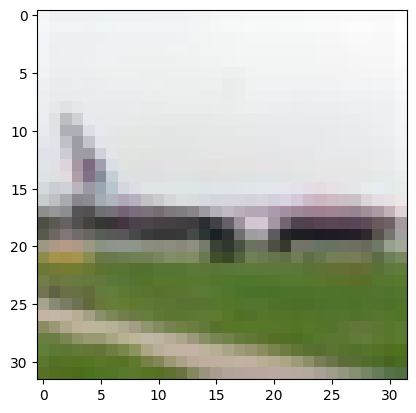

In [8]:
import numpy
img = next(iter(train_loader))[0][0]
plt.imshow(transforms.ToPILImage()(img))

Maximal accuracy:  0.71
Maximal accuracy epoch:  93


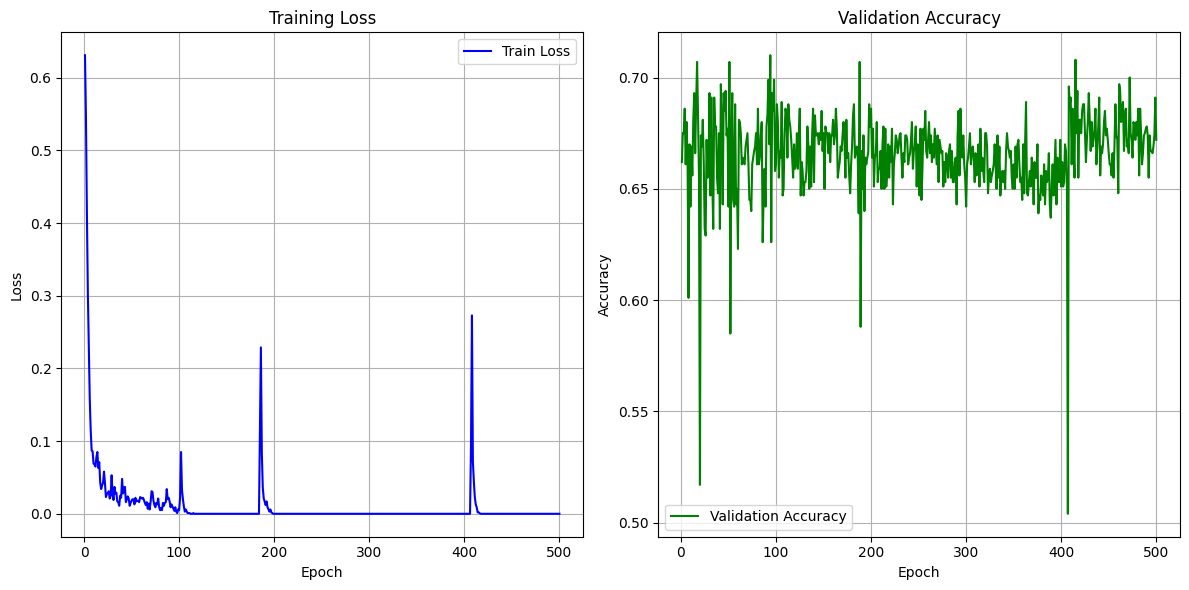

In [7]:
import re
import matplotlib.pyplot as plt

# Path to your log file
#log_file_path = "MedMamba/train_log_cifar10_bis.txt"
#log_file_path = "MedMamba/train_log_cifar100_bis.txt"
log_file_path = "MedMamba/train_log_MHIST.txt"

# Initialize lists to store values
epochs = []
train_loss = []
val_accuracy = []

# Read and process the log file
with open(log_file_path, "r") as file:
    for line in file:
        # Match pattern for epoch, train_loss, and val_accuracy
        match = re.match(r"\[epoch (\d+)\] train_loss: ([\d.]+)  val_accuracy: ([\d.]+)", line)
        if match:
            epochs.append(int(match.group(1)))
            train_loss.append(float(match.group(2)))
            val_accuracy.append(float(match.group(3)))

# Plotting
plt.figure(figsize=(12, 6))

print("Maximal accuracy: ", max(val_accuracy))
print("Maximal accuracy epoch: ", val_accuracy.index(max(val_accuracy)))

# Subplot for training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Train Loss", color="blue")
plt.xlabel("Epoch")
plt.grid()
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Subplot for validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracy, label="Validation Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.grid()
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
